In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv ('hotel_bookings.csv') 

df['is_family'] = '0'

df.loc[df['babies']+df['children'] > 0, 'is_family'] = '1' 

df['number_of_families']=df['is_family'].values

FamilyTime = df.groupby(by=['arrival_date_week_number','is_family']).sum() 

FamilyTime['count']=df.groupby(by=['arrival_date_week_number','is_family']).count()['number_of_families']
FamilyTime = FamilyTime.unstack()
FamilyTime.head(10)

is_canceled     lead_time       arrival_date_year  \
is_family                          0   1         0     1                 0   
arrival_date_week_number                                                     
1                                323  30     57770  6322           1917955   
2                                377  18     53468  2679           2333287   
3                                306  29     49797  3318           2498638   
4                                486  20     66163  2512           2875679   
5                                409  16     54502  2522           2637692   
6                                341  44     55991  3862           2790882   
7                                634  50     95182  8142           3879831   
8                                754  39    114135  5410           4198444   
9                                685  39     94323  6629           3942310   
10                               711  26    140637  3559           4188313   

                                 arrival_date_day_of_month        \
is_family                      1                         0     1   
arrival_date_week_number                                           
1                         193617                      3092   303   
2                         123022                     11176   650   
3                         161336                     20241  1412   
4                         123027                     32999  1521   
5                         159318                     23144  1400   
6                         250058                      9784   887   
7                         373073                     24815  2473   
8                         270235                     41917  2765   
9                         326683                     34194  3208   
10                        145193                     18912   643   

                         stays_in_weekend_nights      ...   \
is_family                                      0    1 ...    
arrival_date_week_number                              ...    
1                                           1001   73 ...    
2                                            896   53 ...    
3                                            949   92 ...    
4                                            833   73 ...    
5                                            866   74 ...    
6                                           1299  135 ...    
7                                           1538  203 ...    
8                                           1389  165 ...    
9                                           1798  166 ...    
10                                          2057   52 ...    

                         days_in_waiting_list           adr            \
is_family                                   0  1          0         1   
arrival_date_week_number                                                
1                                        2275  0   74141.54  11451.04   
2                                        1367  0   76960.82   6248.62   
3                                         922  0   81546.66   7384.86   
4                                        7040  0   97096.66   5984.03   
5                                        3445  0   86680.59   7581.83   
6                                         260  0   93149.80  13180.47   
7                                         685  0  139480.45  20254.85   
8                                         386  0  151533.15  14734.40   
9                                        3989  0  141432.44  17649.57   
10                                       2500  0  152164.84   8330.08   

                         required_car_parking_spaces      \
is_family                                          0   1   
arrival_date_week_number                                   
1                                                 72  15   
2                                                 81   6   
3                                                 92  10   
4       

In [2]:
X = pd.DataFrame(FamilyTime,columns=[('count', '0'),('count','1'),('lead_time', '0'),('lead_time','1')]) #Name columns according to sklearn API
X[('count_ratio','0')]=X[('count','0')]/(X[('count','1')]+X[('count','0')])
X[('count_ratio','1')]=X[('count','1')]/(X[('count','1')]+X[('count','0')])
X[('lead_time_mean','1')]=X[('lead_time','1')]/(X[('count','1')])
X[('lead_time_mean','0')]=X[('lead_time','0')]/(X[('count','0')])
X.head(10)

count      lead_time       count_ratio            \
is_family                    0    1         0     1           0         1   
arrival_date_week_number                                                    
1                          951   96     57770  6322    0.908309  0.091691   
2                         1157   61     53468  2679    0.949918  0.050082   
3                         1239   80     49797  3318    0.939348  0.060652   
4                         1426   61     66163  2512    0.958978  0.041022   
5                         1308   79     54502  2522    0.943043  0.056957   
6                         1384  124     55991  3862    0.917772  0.082228   
7                         1924  185     95182  8142    0.912281  0.087719   
8                         2082  134    114135  5410    0.939531  0.060469   
9                         1955  162     94323  6629    0.923477  0.076523   
10                        2077   72    140637  3559    0.966496  0.033504   

                         lead_time_mean             
is_family                             1          0  
arrival_date_week_number                            
1                             65.854167  60.746583  
2                             43.918033  46.212619  
3                             41.475000  40.191283  
4                             41.180328  46.397616  
5                             31.924051  41.668196  
6                             31.145161  40.455925  
7                             44.010811  49.470894  
8                             40.373134  54.819885  
9                             40.919753  48.247059  
10                            49.430556  67.711603

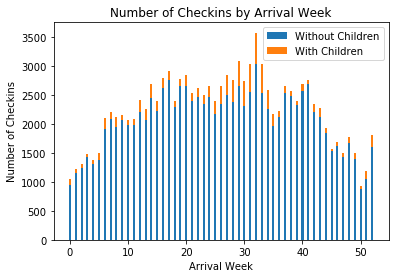

In [3]:
N = 53
withoutChildren = X[('count','0')].values.tolist()
withChildren = X[('count','1')].values.tolist()
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, withoutChildren, width)
p2 = plt.bar(ind, withChildren, width,
             bottom=withoutChildren)


plt.ylabel('Number of Checkins')
plt.xlabel('Arrival Week')
plt.title('Number of Checkins by Arrival Week')
plt.legend((p1[0], p2[0]), ('Without Children', 'With Children'))

plt.show()

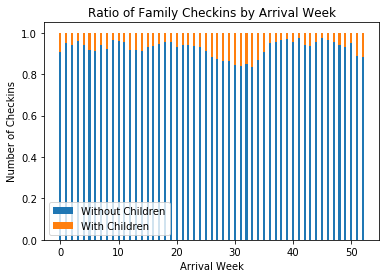

In [4]:
N = 53
withoutChildren = X[('count_ratio','0')].values.tolist()
withChildren = X[('count_ratio','1')].values.tolist()
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, withoutChildren, width)
p2 = plt.bar(ind, withChildren, width,
             bottom=withoutChildren)


plt.ylabel('Number of Checkins')
plt.xlabel('Arrival Week')
plt.title('Ratio of Family Checkins by Arrival Week')
plt.legend((p1[0], p2[0]), ('Without Children', 'With Children'))

plt.show()

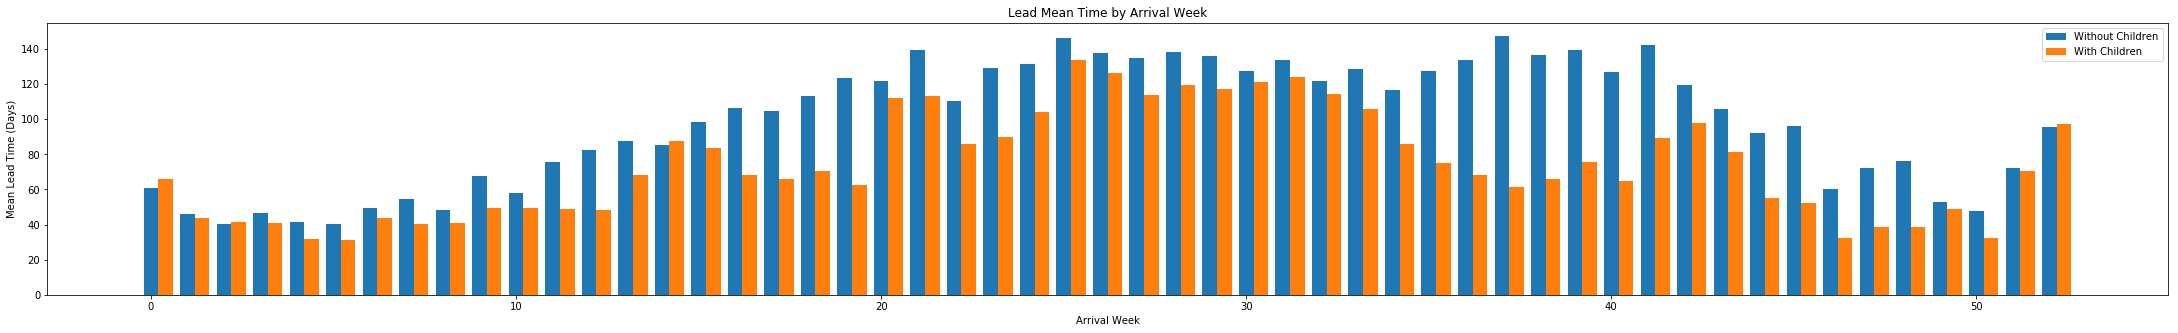

In [5]:
N = 53
withoutChildren = X[('lead_time_mean','0')].values.tolist()
withChildren = X[('lead_time_mean','1')].values.tolist()
ind = np.arange(N)    # the x locations for the groups
width = .4      # the width of the bars: can also be len(x) sequence

f, ax = plt.subplots(figsize=(38,5)) # set the size that you'd like (width, height)

plt.bar(ind, withoutChildren, width)
plt.bar(ind+width, withChildren, width)

plt.ylabel('Mean Lead Time (Days)')
plt.xlabel('Arrival Week')
plt.title('Lead Mean Time by Arrival Week')
ax.legend((p1[0], p2[0]), ('Without Children', 'With Children'))

plt.show()

In [6]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,number_of_families
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,0,0
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,0,0
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03,0,0
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03,0,0
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06,0,0
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22,0,0


In [7]:
df = df.drop(columns=["arrival_date_month","arrival_date_day_of_month","agent","company","market_segment","assigned_room_type","agent","is_family","number_of_families","company","reservation_status","reservation_status_date"])

In [8]:
df.shape

(119390, 24)

In [9]:
df = pd.get_dummies(df, columns=["hotel","meal","distribution_channel","reserved_room_type","deposit_type","customer_type","country"],prefix=["hotel","meal", "channel","room","deposit","customer_type","country"], dummy_na=True)

In [10]:
df.shape

(119390, 230)

In [11]:
df["children"] = df["children"].fillna(0)

In [12]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

copy_1 = df.copy()
base_array = np.full(23878, 0)

inputs = copy_1.drop(columns=["is_canceled"])
outputs = copy_1['is_canceled']

known_input, future_input, known_output, future_output = train_test_split(inputs, outputs, test_size=0.2, random_state=42)

In [13]:
k_accuracy = []

k_vals = list(range(1,11))

for k in k_vals:
    model = KNeighborsClassifier(k)
    model.fit(known_input, known_output) # tell it known stuff
    predictions = model.predict(future_input) # given future input, predict future output!
    k_accuracy.append(accuracy_score(future_output, predictions))

('baseline ', 0.6242985174637742)


('k accuracy ', 0.7876706591841863)
('k improvement', 0.26168913933051596)

('k accuracy ', 0.8029985760951504)
('k improvement', 0.28624136311799825)

('k accuracy ', 0.7838177401792444)
('k improvement', 0.25551754209431804)

('k accuracy ', 0.790979143981908)
('k improvement', 0.26698866304420743)

('k accuracy ', 0.7805930144903258)
('k improvement', 0.2503521835379352)

('k accuracy ', 0.7855766814641092)
('k improvement', 0.25833501039779966)

('k accuracy ', 0.7792528687494765)
('k improvement', 0.24820554102099687)

('k accuracy ', 0.7829801490912137)
('k improvement', 0.25417589052123174)

('k accuracy ', 0.775106792863724)
('k improvement', 0.24156436573421888)

('k accuracy ', 0.7788759527598627)
('k improvement', 0.24760179781310798)

('max k accuracy ', 0.8029985760951504)
('max k accuracy k ', 2)


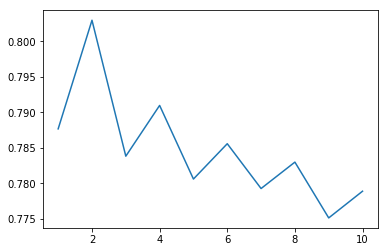

In [14]:
baseline = accuracy_score(future_output, base_array)

print('baseline ', baseline)
print('')
print('')

for a in k_accuracy:
    print('k accuracy ', a)
    print('k improvement', (a-baseline)/baseline)
    print('')

    
plt.plot(k_vals, k_accuracy)

print('max k accuracy ', max(k_accuracy))
print('max k accuracy k ', 1+ k_accuracy.index(max(k_accuracy)))

In [15]:
from sklearn.tree import DecisionTreeClassifier

m_accuracy = []
m_depths = list(range(1,60))

for m in m_depths:
    model = DecisionTreeClassifier(max_depth=m)
    model.fit(known_input, known_output) # tell it known stuff
    predictions = model.predict(future_input) # given future input, predict future output!
    m_accuracy.append(accuracy_score(future_output, predictions))

('baseline ', 0.6242985174637742)


('m accuracy ', 0.7490995895803668)
('m improvement', 0.1999060843898839)

('m accuracy ', 0.7493089873523746)
('m improvement', 0.20024149728315563)

('m accuracy ', 0.7607002261495938)
('m improvement', 0.21848795867713156)

('m accuracy ', 0.765516374905771)
('m improvement', 0.22620245522237867)

('m accuracy ', 0.7738085266772762)
('m improvement', 0.23948480579593484)

('m accuracy ', 0.7982661864477762)
('m improvement', 0.2786610317300598)

('m accuracy ', 0.8086523159393584)
('m improvement', 0.2952975112363319)

('m accuracy ', 0.8168607086020605)
('m improvement', 0.30844569665257937)

('m accuracy ', 0.827581874528855)
('m improvement', 0.3256188367880861)

('m accuracy ', 0.8298014909121367)
('m improvement', 0.32917421345676534)

('m accuracy ', 0.8357902671915571)
('m improvement', 0.33876702220433363)

('m accuracy ', 0.8390149928804758)
('m improvement', 0.34393238076071647)

('m accuracy ', 0.8419046821341821)
('m improvement', 0.34

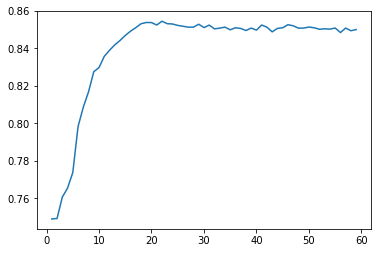

In [16]:
baseline = accuracy_score(future_output, base_array)

print('baseline ', baseline)
print('')
print('')


for a in m_accuracy:
    print('m accuracy ', a)
    print('m improvement', (a-baseline)/baseline)
    print('')

    
plt.plot(m_depths, m_accuracy)

print('max m accuracy ', max(m_accuracy))
print('max m accuracy depth ', 1+ m_accuracy.index(max(m_accuracy)))

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

m_error = []
m_accuracies = []
#Fill in code here
kf = KFold(n_splits=5)

copy_2 = df.copy()
copy_2 = copy_2.sample(frac=1).reset_index(drop=True)


base_array = np.full(23878, 0)

inputs = copy_2.drop(columns=["is_canceled"])
outputs = copy_2['is_canceled']

for train_index, test_index in kf.split(inputs):
    inputs_train, inputs_test = inputs.iloc[train_index], inputs.iloc[test_index]
    outputs_train, outputs_test = outputs.iloc[train_index], outputs.iloc[test_index]
    
    model = DecisionTreeClassifier(max_depth=20)
    model.fit(inputs_train, outputs_train) # tell it known stuff
    predictions = model.predict(inputs_test) # given future input, predict future output!
    m_error.append(mean_squared_error(outputs_test, predictions))
    m_accuracies.append(accuracy_score(outputs_test, predictions))

In [19]:
print('errors')
for e in m_error:
    print(e)
print('')
print('average mean squared error', np.mean(m_error))
print('')
print('accuracies')
for a in m_accuracies:
    print(a)
print('average accuracy', np.mean(m_accuracies))

errors
0.14808610436384956
0.15256721668481446
0.1493424909958958
0.14544769243655248
0.15018008208392664

('average mean squared error', 0.1491247173130078)

accuracies
0.8519138956361504
0.8474327833151856
0.8506575090041042
0.8545523075634476
0.8498199179160734
('average accuracy', 0.8508752826869921)


In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs',max_iter=10000)
model.fit(known_input, known_output) # tell it known stuff
predictions = model.predict(future_input) # given future input, predict future output!
l_accuracy = accuracy_score(future_output, predictions)

In [21]:
baseline = accuracy_score(future_output, base_array)

print('baseline ', baseline)
print('')
print('')

print('l accuracy ', l_accuracy)
print('l improvement', (l_accuracy-baseline)/baseline)
print('')

('baseline ', 0.6242985174637742)


('l accuracy ', 0.8073540497529106)
('l improvement', 0.29321795129804784)

